1. Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

2. Importing Data & Data Preprocessing

In [2]:
df=pd.read_csv('C:/Users/abshi/OneDrive/Desktop/Data Analyst/datasets/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Shape :",df.shape)

Shape : (284807, 31)


In [4]:
# Data cleaning
df.isnull().sum()
# No null values present

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
print(df.shape)
# there are 283726 rows and 31 coloums

(283726, 31)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [7]:
fraud = df [df['Class'] == 1]
valid = df[df['Class'] == 0]

print('Total Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Total Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Total Fraud Cases: 473
Total Valid Transactions: 283253


Exploratory Data Analysis (EDA)

In [8]:
df[df['Class'] == 1].describe().round(3).T         #Basic statistics for frauds

,count,mean,std,min,25%,50%,75%,max
Time,473.0,80450.514,48636.180,406.000,41203.000,73408.000,129095.000,170348.000
V1,473.0,-4.498,6.593,-30.552,-5.604,-2.272,-0.361,2.132
V2,473.0,3.406,4.123,-8.402,1.145,2.617,4.572,22.058
V3,473.0,-6.730,6.910,-31.104,-7.927,-4.875,-2.171,2.250
V4,473.0,4.473,2.872,-1.313,2.289,4.100,6.291,12.115
V5,473.0,-2.957,5.279,-22.106,-4.279,-1.372,0.261,11.095
V6,473.0,-1.433,1.715,-6.406,-2.450,-1.420,-0.414,6.474
V7,473.0,-5.176,6.858,-43.557,-6.989,-2.902,-0.907,5.803
V8,473.0,0.953,5.586,-41.044,-0.162,0.618,1.709,20.007
V9,473.0,-2.522,2.465,-13.434,-3.797,-2.099,-0.788,3.354


Inference: Mean amount for a fraud transaction is 123.872 and maximum is 2125.870

In [9]:
df[df['Class'] == 0].describe().round(3).T         #Basic statistics for non-frauds

,count,mean,std,min,25%,50%,75%,max
Time,283253.0,94835.058,47475.551,0.000,54233.000,84711.000,139308.000,172792.000
V1,283253.0,0.013,1.922,-56.408,-0.913,0.023,1.317,2.455
V2,283253.0,-0.010,1.634,-72.716,-0.601,0.063,0.797,18.902
V3,283253.0,0.013,1.458,-48.326,-0.884,0.182,1.028,9.383
V4,283253.0,-0.010,1.399,-5.683,-0.852,-0.024,0.734,16.875
V5,283253.0,0.007,1.356,-113.743,-0.688,-0.053,0.612,34.802
V6,283253.0,0.001,1.330,-26.161,-0.768,-0.274,0.398,73.302
V7,283253.0,0.010,1.177,-31.765,-0.550,0.042,0.571,120.589
V8,283253.0,-0.002,1.157,-73.217,-0.209,0.022,0.324,18.709
V9,283253.0,0.003,1.087,-6.291,-0.642,-0.051,0.597,15.595


Inference:- Mean amount for a legitimate transaction is 88.414 and maximum is 25691.160

In [10]:
#Descriptive statistics for fraudulent (1) and non-fraudulent transactions (0) Amount column
df.groupby('Class')['Amount'].describe().T.round(3)

Class,0,1
count,283253.000,473.000
mean,88.414,123.872
std,250.379,260.211
min,0.000,0.000
25%,5.670,1.000
50%,22.000,9.820
75%,77.460,105.890
max,25691.160,2125.870


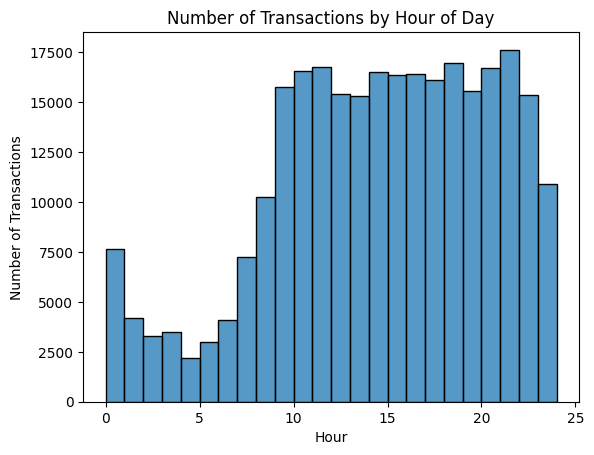

In [11]:
df['Hour'] = (df['Time'] / 3600) % 24 # Creating hour column for hist purposes

sns.histplot(data=df, x='Hour', bins=24, kde=False)
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

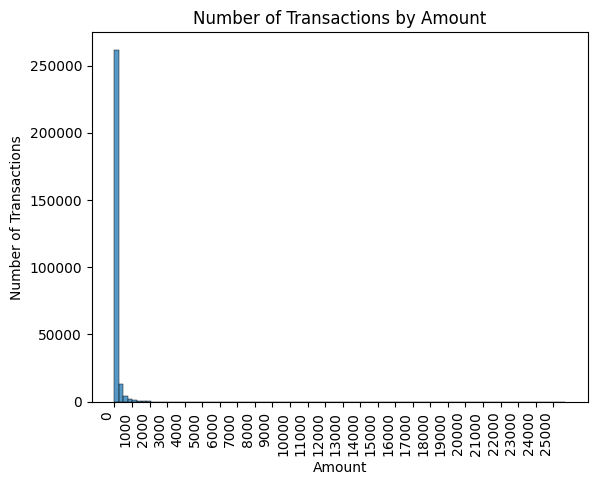

In [12]:
sns.histplot(data=df, x='Amount', bins=100, kde=False)
plt.xticks(range(0, 26000, 1000), rotation=90, ha='right')
plt.title('Number of Transactions by Amount')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()


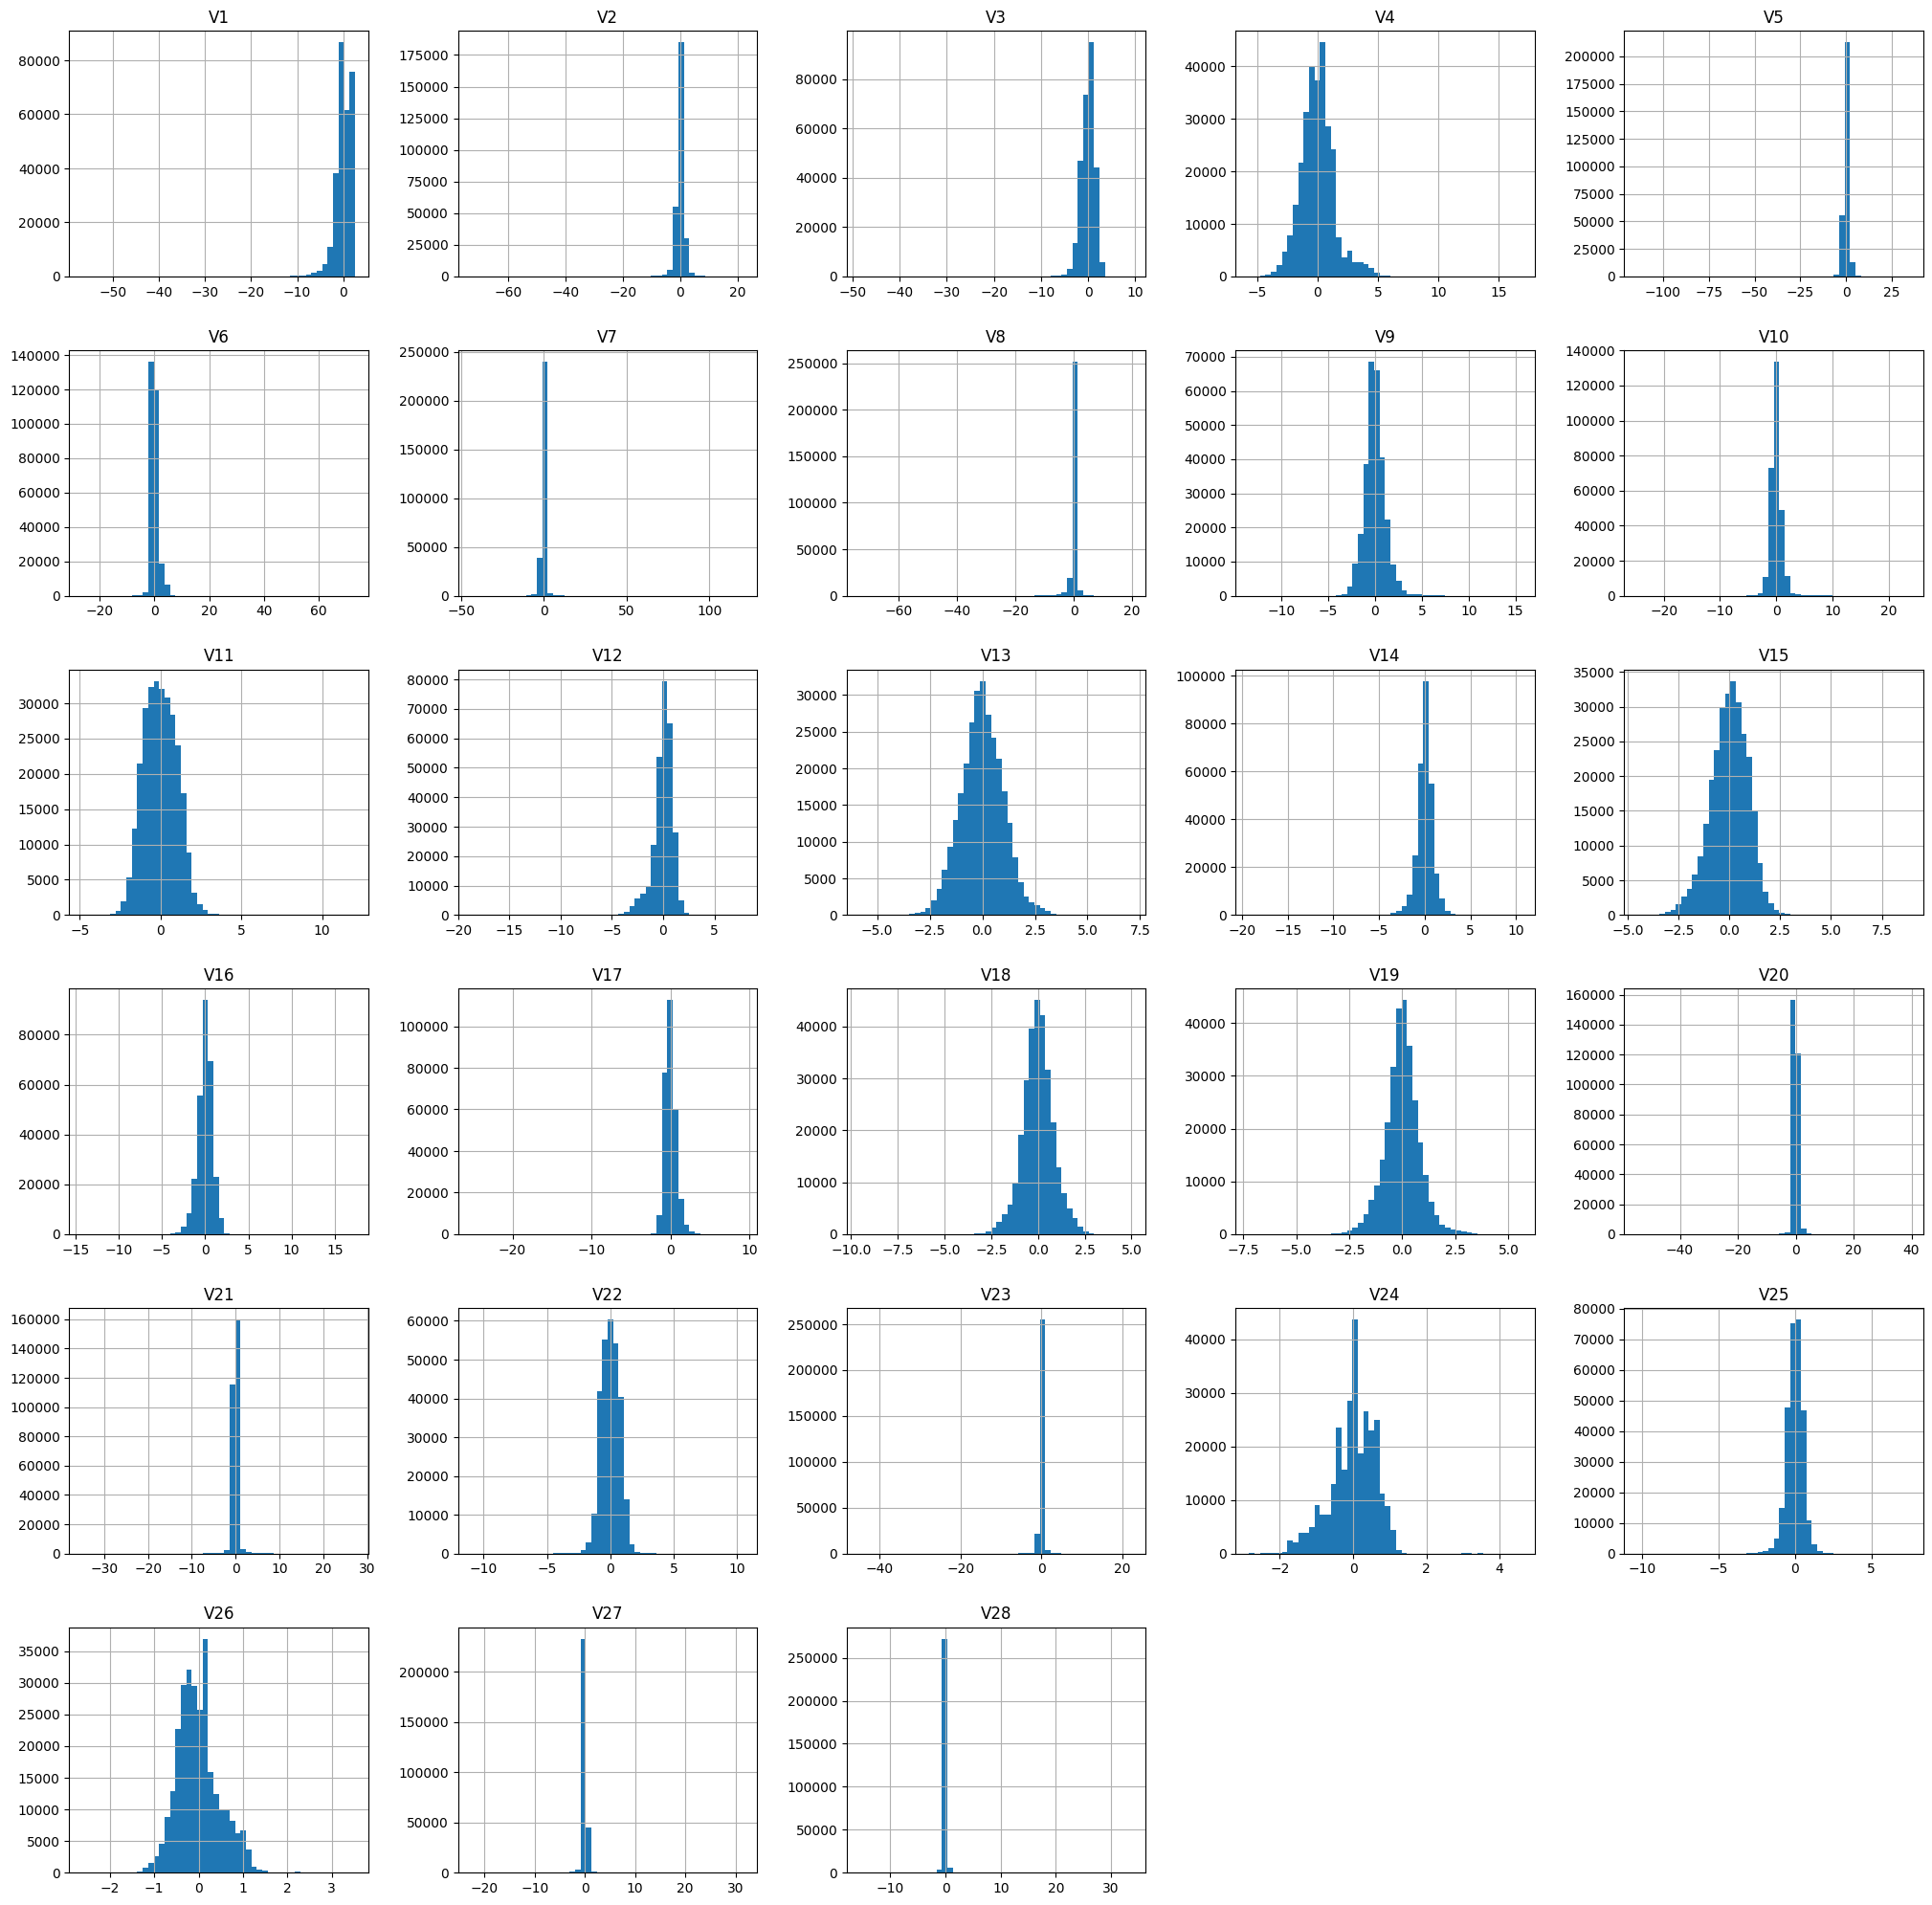

In [13]:
# Only V columns for hist purposes
V= [f'V{i}' for i in range (1,29)]

# Histogram for each V column
df[V].hist(figsize = (25, 25), bins=50)
plt.show()

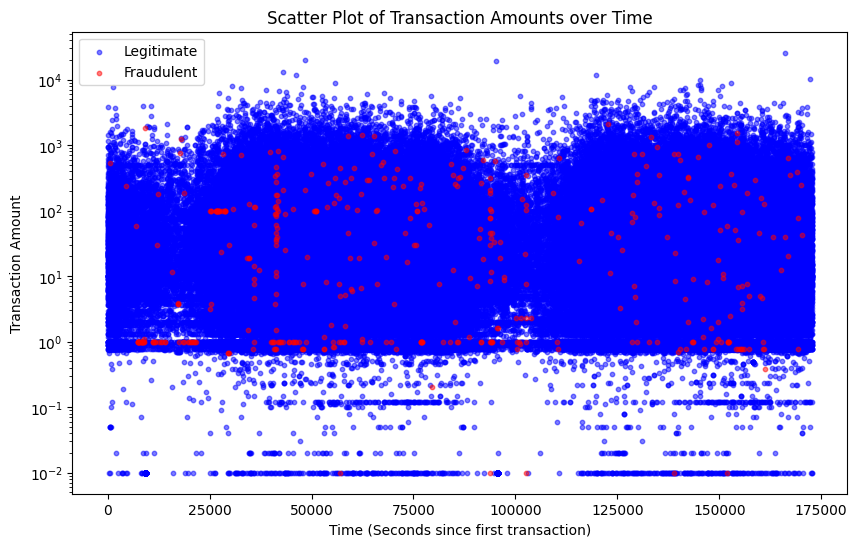

In [14]:
# Scatter Plot of Amount vs. Time
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], alpha=0.5, label='Legitimate', color='blue', s=10)
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], alpha=0.5, label='Fraudulent', color='red', s=10)
plt.xlabel('Time (Seconds since first transaction)')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.title('Scatter Plot of Transaction Amounts over Time')
plt.legend()
plt.show()

In [15]:
df=df.drop('Hour',axis=1)

<Axes: >

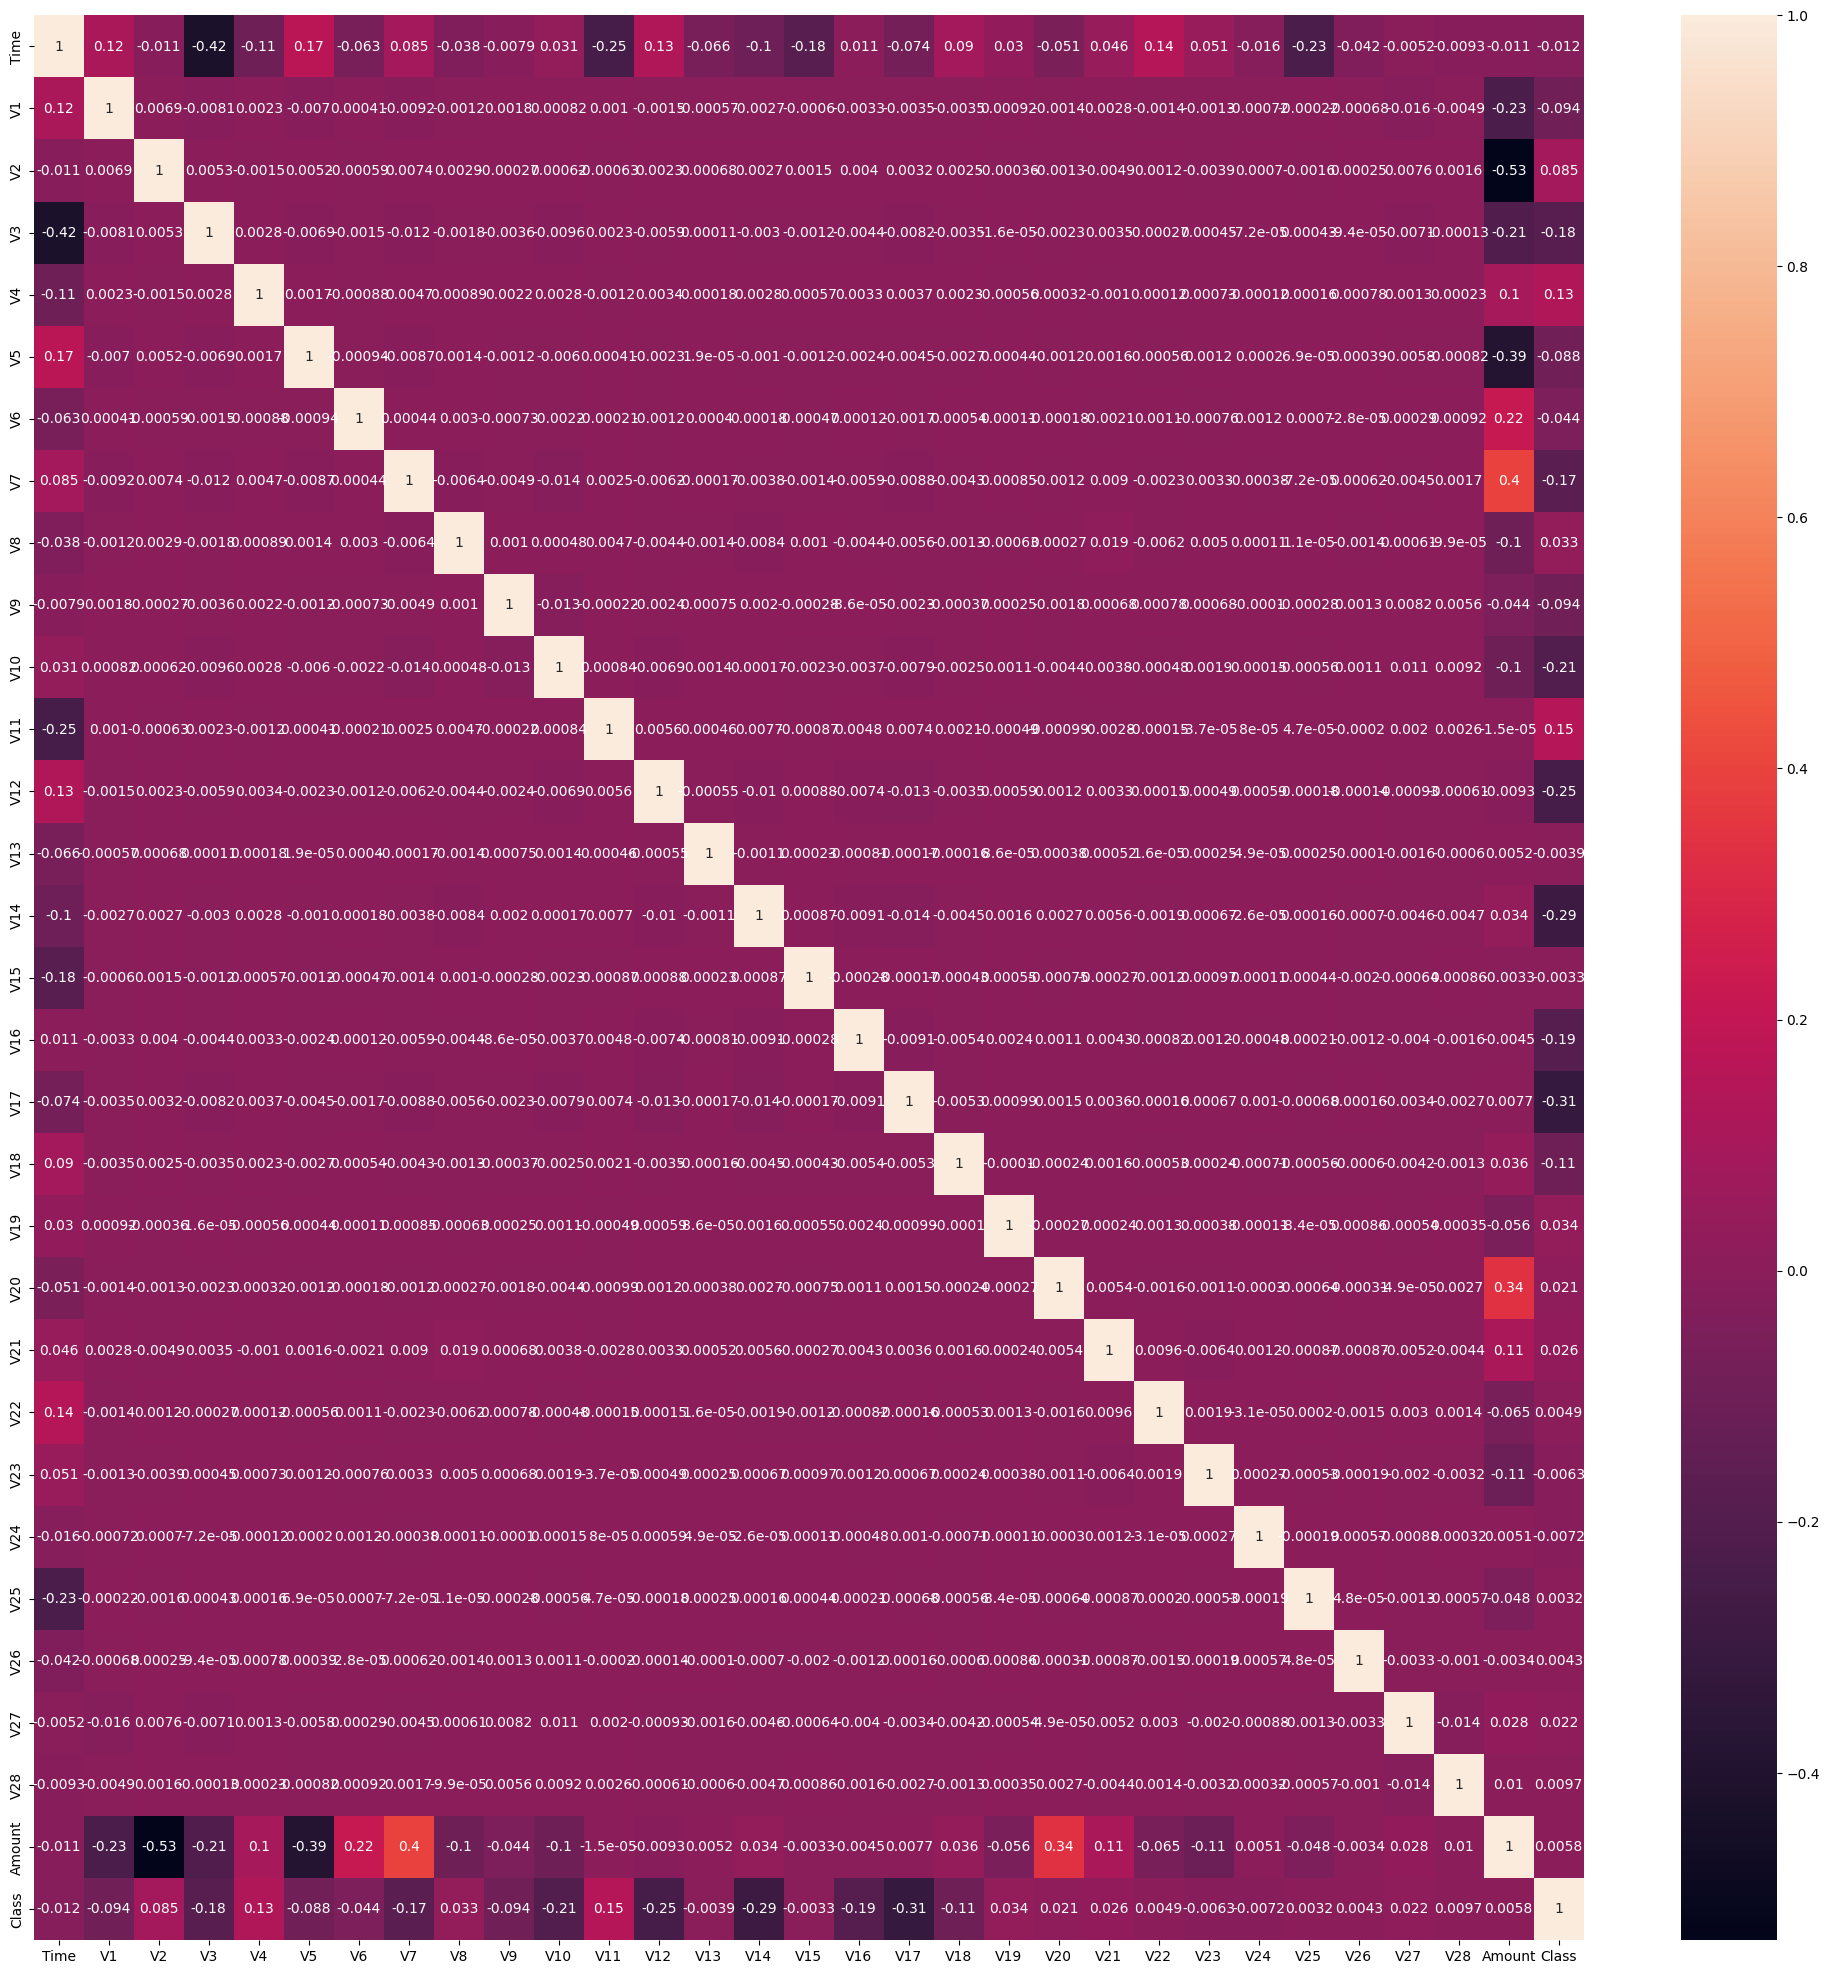

In [16]:
# To find multi-collinearity present in the data
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(),annot=True)

Inference:- From the heatmap it is evident that there is no multicollinearity present 

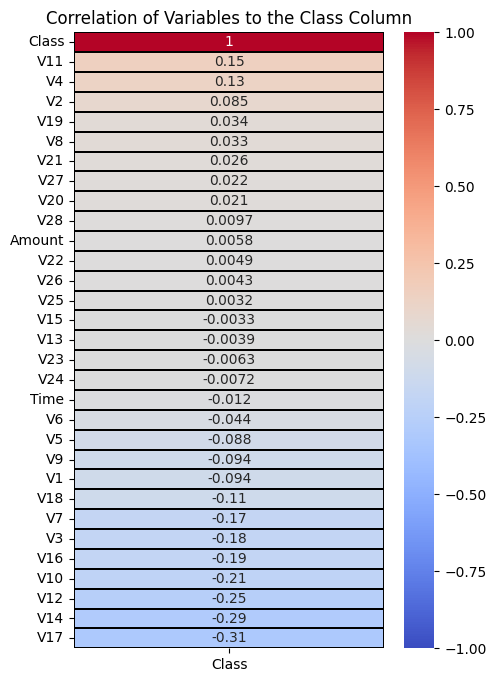

In [17]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['Class'].sort_values(ascending=False).to_frame(), cmap='coolwarm',
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black')
plt.title('Correlation of Variables to the Class Column')
plt.show()

Inference:- It can be seen that there is less correlation present between class and any other variable

In [18]:
# Outliers detection
from scipy.stats import iqr

iqr=iqr(df['Amount'])
lower_threshold = np.quantile(df['Amount'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(df['Amount'], 0.75) + 1.5 * iqr
filer = (df['Amount'] < lower_threshold) | (df['Amount'] > upper_threshold)
print('All outliers', df[filer]['Amount'].count())
print('Outliers for frauds ', df[filer & (df['Class'] == 1)]['Amount'].count())
print('Outliers for non-frauds', df[filer & (df['Class'] == 0)]['Amount'].count())

All outliers 31685
Outliers for frauds  87
Outliers for non-frauds 31598


In [19]:
# Removing outliers
filtered_data = df[(df['Amount'] >= lower_threshold) & (df['Amount'] <= upper_threshold)]
print("New shape: ",filtered_data.shape)

New shape:  (252041, 31)


Feature Selection

In [20]:
# Scaling data
scaler=StandardScaler()
scaler.fit(filtered_data)

# Split features and target
features = [f'V{i}' for i in range(1, 29)] + ['Amount', 'Time']
X = filtered_data[features]
y = filtered_data['Class']

In [21]:
# Model Building
from sklearn.linear_model import LogisticRegression
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# fitting logistic regression model

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\Python 3.12.3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9989684381757226

In [22]:
y_pred=model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_pred))
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.82      0.49      0.61        84

    accuracy                           1.00     50409
   macro avg       0.91      0.74      0.81     50409
weighted avg       1.00      1.00      1.00     50409

Confusion matrix :
 [[50316     9]
 [   43    41]]
Accuracy: 99.90%


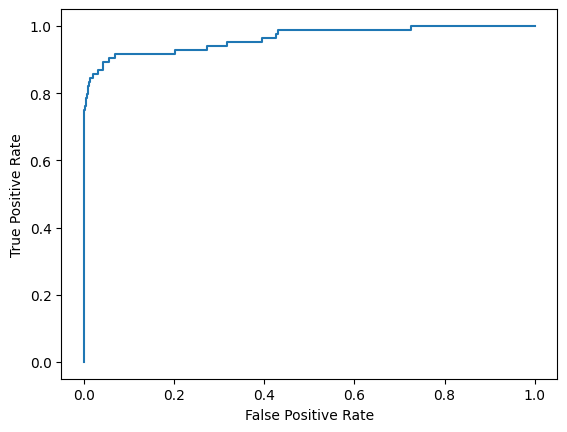

AUC: 0.9630


In [23]:
# ROC AUC Curve
# Calculate predicted probabilities
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

Decision tree classifier

In [24]:
# Train Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred1 = clf.predict(X_test)

# Model score
clf.score(X_test,y_test)

0.9993255172687417

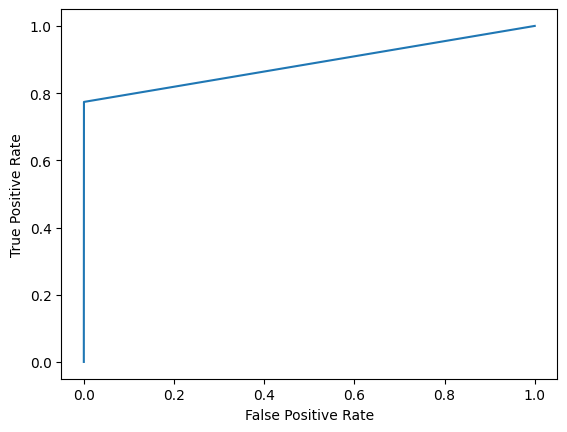

AUC: 0.8868


In [25]:
y_pred_proba1 = clf.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba1)

# Create ROC curve
plt.plot(fpr1, tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
print(f"AUC: {auc1:.4f}")

In [26]:
print('Classifcation report:\n', classification_report(y_test, y_pred1))
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred1))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred1)*100))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.81      0.77      0.79        84

    accuracy                           1.00     50409
   macro avg       0.91      0.89      0.90     50409
weighted avg       1.00      1.00      1.00     50409

Confusion matrix :
 [[50310    15]
 [   19    65]]
Accuracy: 99.93%
